In [1]:
from datetime import datetime
import tensorboard
import tensorflow as tf
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.layers import Input, Dense,BatchNormalization,Activation, GaussianDropout,SeparableConv2D, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16, ResNet50, VGG19, Xception
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt
import cv2


In [2]:
labels = ['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound']

In [3]:
img_size=(128,128)
channels=3

In [4]:
# resizing and converting to RGB
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, img_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
dogml=tf.keras.models.load_model('dogml_custom_model.h5')

In [6]:
dogml.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 128, 128, 256)     1051      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 256)     1024      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 256)     0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              263168    
_________________________________________________________________
gaussian_dropout (GaussianDr (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [20]:
imgX = load_and_preprocess_image('celebrity_image_dataset_1/val/jerry_seinfeld/httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg')

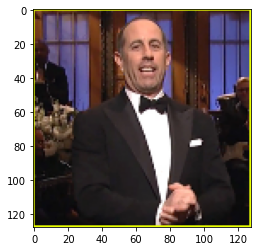

In [21]:
plt.imshow(imgX)

In [22]:
pred = dogml.predict(imgX.reshape(1,*img_size,channels))

In [23]:
labels[list(pred[0]).index(max(pred[0]))].split("-")[1].replace("_"," ")

'Chihuahua'

In [15]:
!ls 

celebrity_image_dataset_1/val/jerry_seinfeld/httpcdncdnjustjaredcomwpcontentuploadsheadlinesjerryseinfeldmakesbrianwilliamsjokejpg.jpg


In [34]:
def predImg(image):
    imgX = load_and_preprocess_image(image)    
    #plt.imshow(imgX)
    pred = dogml.predict(imgX.reshape(1,*img_size,channels))
    return labels[list(pred[0]).index(max(pred[0]))].split("-")[1].replace("_"," ")

'Chihuahua'

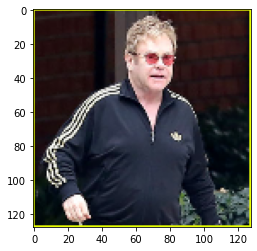

In [27]:
predImg('celebrity_image_dataset_2/data/val/elton_john/httpcdncdnjustjaredcomwpcontentuploadsheadlineseltonjohnsupportsbrucejennerstransitiontowomanjpg.jpg')

In [28]:
import os

In [35]:
for directory in os.listdir('celebrity_image_dataset_2/data/val'):
    print(f'celebrity_image_dataset_2/data/val/{directory}')
    for file in os.listdir('celebrity_image_dataset_2/data/val/'+directory):
        try:
            print(predImg(f'celebrity_image_dataset_2/data/val/{directory}/{file}'))
        except Exception as e:
            print(f'celebrity_image_dataset_2/data/val/{directory}/{file} - {e}')

celebrity_image_dataset_2/data/val/anne_hathaway
Blenheim spaniel
basset
Rhodesian ridgeback
Shih
bluetick
Pekinese
celebrity_image_dataset_2/data/val/arnold_schwarzenegger
Rhodesian ridgeback
Afghan hound
beagle
papillon
Pekinese
celebrity_image_dataset_2/data/val/ben_afflek
Rhodesian ridgeback
Japanese spaniel
toy terrier
Walker hound
beagle
celebrity_image_dataset_2/data/val/dwayne_johnson
Shih
beagle
beagle
Japanese spaniel
bloodhound
celebrity_image_dataset_2/data/val/elton_john
beagle
Japanese spaniel
toy terrier
Chihuahua
Pekinese
celebrity_image_dataset_2/data/val/jerry_seinfeld
Pekinese
black
Blenheim spaniel
Chihuahua
basset
celebrity_image_dataset_2/data/val/kate_beckinsale
Blenheim spaniel
beagle
Shih
toy terrier
celebrity_image_dataset_2/data/val/keanu_reeves
Chihuahua
beagle
Afghan hound
celebrity_image_dataset_2/data/val/keanu_reeves/509px-Keanu_Reeves_at_São_Paulo,_Brazil_--_2019-04-03_(cropped).jpg - OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\re

In [36]:
predImg('labrador.jpg')

'beagle'

In [37]:
predImg('floof.jpg')

'toy terrier'